# Excercise 3: Tensorflow TensorBoard
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl03_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

Train a deep MLP on the Fashion MNIST dataset.
- Define tensorflow model with 2 hidden layers (300,100), fit it and score
- Try searching for the optimal learning rate by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up. 
- Try adding all extra features — save checkpoints, use early stopping, and plot learning curves using TensorBoard.
- Experiment with 3-layer Neural Networks (NN-3), a 6-layer (NN-6) and a 12-layer Neural Network (NN-12)
- Experiment with activation functions, initialisations and optimizers
- Add batch normalization and drop out
- Analyse output in Tensorboard

Check https://keras.io/api/

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os, datetime

In [10]:
# class names are not included with the dataset, so we define them here
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
# load the dataset, split it into training, validation and test sets
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
# scale the pixel intensities to the [0, 1] range
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [13]:
# check the shape of the training set
X_train.shape

(55000, 28, 28)

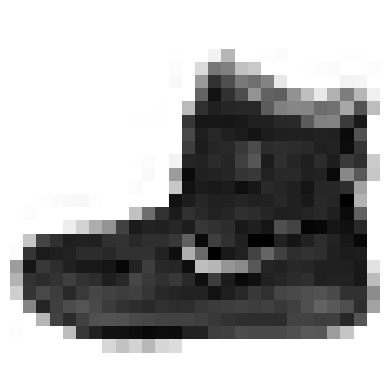

In [14]:
# visualize the first image in the training set
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
# define a callback that will print the validation/train ratio at the end of each epoch
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)


In [16]:
# define the hyperparameters
learning_rate = 0.01
dropout_rate = 0.2
patience = 10


# define the model with different numbers of hidden layers and 10 output neurons and softmax activation
# experiment with different dropout rates and learning rates
model_base = tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(dropout_rate, name="dropout1"),
    tf.keras.layers.Dense(300, activation="relu", name="hidden1"),
    # tf.keras.layers.Dropout(dropout_rate, name="dropout2"),
    tf.keras.layers.Dense(100, activation="relu", name="hidden2"),
    # tf.keras.layers.Dropout(dropout_rate, name="dropout3"),
    tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
    )

# define the tensorboard callback
ts = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"fashion_mnist_lr{learning_rate}_do{dropout_rate}_p{patience}{ts}")
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir,
                                                profile_batch=(100, 200))
# define the early stopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=patience,
                                                     restore_best_weights=True)
# make a copy of the model so you can use it multiple times
model = tf.keras.models.clone_model(model_base)

# define the optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb,tensorboard_cb])
# you can plot history to see the training history when not using tensorboard

2023-03-21 11:34:17.072063: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-21 11:34:17.072073: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-21 11:34:17.072130: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


Epoch 1/40
   1/1719 [..............................] - ETA: 10:00 - loss: 2.6443 - accuracy: 0.0938

2023-03-21 11:34:17.505589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 125/1719 [=>............................] - ETA: 13s - loss: 1.0189 - accuracy: 0.6375

2023-03-21 11:34:18.531991: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-21 11:34:18.532006: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 211/1719 [==>...........................] - ETA: 16s - loss: 0.8757 - accuracy: 0.6832

2023-03-21 11:34:19.731023: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-21 11:34:19.750857: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-21 11:34:19.761951: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fashion_mnist_lr0.01_do0.2_p1020230321-113417/plugins/profile/2023_03_21_11_34_19

2023-03-21 11:34:19.775044: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fashion_mnist_lr0.01_do0.2_p1020230321-113417/plugins/profile/2023_03_21_11_34_19/MB16MS.local.trace.json.gz
2023-03-21 11:34:19.799364: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fashion_mnist_lr0.01_do0.2_p1020230321-113417/plugins/profile/2023_03_21_11_34_19

2023-03-21 11:34:19.802546: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.jso

1719/1719 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7917

2023-03-21 11:34:31.145048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 15s 8ms/step - loss: 0.5814 - accuracy: 0.7917 - val_loss: 0.4379 - val_accuracy: 0.8416
Epoch 2/40
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4659 - accuracy: 0.8323 - val_loss: 0.4403 - val_accuracy: 0.8332
Epoch 3/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4433 - accuracy: 0.8415 - val_loss: 0.4262 - val_accuracy: 0.8488
Epoch 4/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4299 - accuracy: 0.8467 - val_loss: 0.4111 - val_accuracy: 0.8490
Epoch 5/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4238 - accuracy: 0.8489 - val_loss: 0.3998 - val_accuracy: 0.8586
Epoch 6/40
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4218 - accuracy: 0.8522 - val_loss: 0.4078 - val_accuracy: 0.8558
Epoch 7/40
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4071 - accuracy: 0.8555 - val_loss: 0.4166 - val_accuracy: 0.8

In [17]:
# change the hyperparameters and retrain the model while checking the tensorboard

In [18]:
# load tensorboard extension
%load_ext tensorboard

In [19]:
# start tensorboard
%tensorboard --logdir logs